# Question 4
**Present an efficient algorithm for finding <i>[Node Betweenness Centrality](https://en.wikipedia.org/wiki/Betweenness_centrality)</i>**

In [1]:
import networkx as nx
import numpy as np

In [2]:
G = nx.Graph()


nx.add_path(G, [1, 2, 3, 4, 5, 6, 7, 8, 1])
nx.add_path(G, [2, 5, 11])
nx.add_path(G, [9, 2, 10])
nx.add_path(G, [3, 12])
nx.add_path(G, [2, 7])
nx.add_path(G, [6, 13, 14])
# nx.add_path(G, [0, 10, 2])
# print([p for p in nx.all_shortest_paths(G, source=0, target=2)])


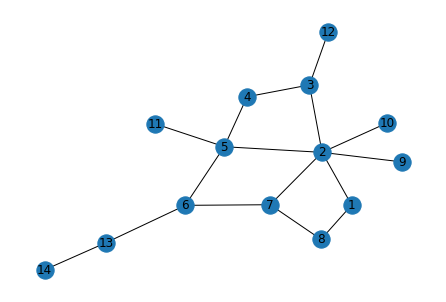

In [33]:
nx.draw(G, with_labels=True)

**Algorithm:**<br>
For every **$i$** and <b>$j$</b> node in graph we find all shortest paths between them, we know that if $[i, z, k, p, j]$ is a path then one of the shortest paths from $z$ to $p$ is also $[z, k,p]$, we have a list of paths called `checked_paths` with contains all the paths that we have currently passed and modified <i>Betweenness Centrality</i> for that node.<br>
> for each path from $i$ to $j$:
> **A.** modify `BC` for every node in path;<br>
> **B.** while path.len > 1 <br>
> **C.** path.pop_left()<br>
> **D.** path.pop_right()<br>

In [45]:
checked_paths = []
BC = np.zeros((G.number_of_nodes(),1))
for i in G.nodes():
    for j in reversed(list(G.nodes())):
        if j==i:
            break
        shortest_paths_from_i_to_j = [p for p in nx.all_shortest_paths(G, source=i, target=j)]
        while shortest_paths_from_i_to_j:
            path = shortest_paths_from_i_to_j.pop()
            while len(path) > 1:
                if path in checked_paths or list(reversed(path)) in checked_paths:
                    path = path[1:-1]
                    continue
                checked_paths.append(path)
                for v in path[1:-1]:
                    BC[v-1] += 1
                path = path[1:-1]
                    
            
            
for i,j in enumerate(BC):
    print(f"Betweenness Centrality of Node {i+1}: {j.item()} without normalization")

Betweenness Centrality of Node 1: 9.0 without normalization
Betweenness Centrality of Node 2: 80.0 without normalization
Betweenness Centrality of Node 3: 28.0 without normalization
Betweenness Centrality of Node 4: 10.0 without normalization
Betweenness Centrality of Node 5: 53.0 without normalization
Betweenness Centrality of Node 6: 46.0 without normalization
Betweenness Centrality of Node 7: 36.0 without normalization
Betweenness Centrality of Node 8: 4.0 without normalization
Betweenness Centrality of Node 9: 0.0 without normalization
Betweenness Centrality of Node 10: 0.0 without normalization
Betweenness Centrality of Node 11: 0.0 without normalization
Betweenness Centrality of Node 12: 0.0 without normalization
Betweenness Centrality of Node 13: 21.0 without normalization
Betweenness Centrality of Node 14: 0.0 without normalization


There is another Algorithm called <i>**[Brandes Method]** (https://www.tandfonline.com/doi/abs/10.1080/0022250X.2001.9990249)</i> which finds betweenness centrality of graph:

In [48]:
nx.betweenness_centrality(G, normalized=True)

{1: 0.045726495726495724,
 2: 0.5679487179487179,
 3: 0.18888888888888888,
 4: 0.05128205128205128,
 5: 0.35598290598290594,
 6: 0.3102564102564102,
 7: 0.20427350427350424,
 8: 0.019230769230769232,
 11: 0.0,
 9: 0.0,
 10: 0.0,
 12: 0.0,
 13: 0.15384615384615385,
 14: 0.0}